<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [34]:
#ваш код здесь
# Исправляем путь и читаем файл с обработкой ошибок
head_hanter = pd.read_csv(
    "data/dst-3.0_16_1_hh_database.csv",
    sep=';',)          # указание разделителя - точка с запятой

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [35]:
#ваш код здесь
print(head_hanter.head())
print(head_hanter.tail())


                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [36]:
#ваш код здесь
print(head_hanter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [37]:
#ваш код здесь
print(head_hanter.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [38]:
#ваш код здесь
# Создаем функцию для извлечения уровня образования
def extract_education(edu_str):
    if pd.isna(edu_str):
        return None
    
    # Берем первые три слова и приводим к нижнему регистру
    first_words = ' '.join(edu_str.split()[:3]).lower()
    
    # Определяем категорию по ключевым словам
    if 'неоконченное высшее' in first_words:
        return 'неоконченное высшее'
    elif 'высшее' in first_words:
        return 'высшее'
    elif 'среднее специальное' in first_words:
        return 'среднее специальное'
    elif 'среднее' in first_words:
        return 'среднее'
    return None

# Применяем функцию к столбцу
head_hanter['Образование'] = head_hanter['Образование и ВУЗ'].apply(extract_education)

# Проверяем уникальные значения
print("Уникальные значения образования:")
print(head_hanter['Образование'].value_counts(dropna=False))

# Удаляем исходный столбец
head_hanter.drop('Образование и ВУЗ', axis=1, inplace=True)

# Проверяем результат
print("\nПервые 5 строк после преобразования:")
print(head_hanter[['Образование']].head())

Уникальные значения образования:
Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

Первые 5 строк после преобразования:
           Образование
0  неоконченное высшее
1               высшее
2  среднее специальное
3               высшее
4               высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [39]:
#ваш код здесь
# Разбиваем столбец на составляющие
def extract_gender_age(row):
    parts = row.split(',')
    
    # Извлекаем пол
    gender_part = parts[0].strip()
    gender = 'М' if 'Мужчина' in gender_part else 'Ж'
    
    # Извлекаем возраст
    age_part = parts[1].strip()
    age = ''.join(filter(str.isdigit, age_part))  # Извлекаем только цифры
    
    return gender, int(age) if age else None

# Применяем функцию к столбцу
head_hanter[['Пол', 'Возраст']] = head_hanter['Пол, возраст'].apply(
    lambda x: pd.Series(extract_gender_age(x))
)

# Проверяем результат
print("Первые 5 строк преобразованных данных:")
print(head_hanter[['Пол, возраст', 'Пол', 'Возраст']].head())

# Проверяем уникальные значения
print("\nУникальные значения пола:", head_hanter['Пол'].unique())
print("Диапазон возрастов:", head_hanter['Возраст'].min(), "-", head_hanter['Возраст'].max())

# Удаляем исходный столбец
head_hanter.drop('Пол, возраст', axis=1, inplace=True)

# Проверяем финальный результат
print("\nСтруктура таблицы после преобразования:")
print(head_hanter.info())

Первые 5 строк преобразованных данных:
                                   Пол, возраст Пол  Возраст
0    Мужчина ,  39 лет , родился 27 ноября 1979   М       39
1     Мужчина ,  60 лет , родился 20 марта 1959   М       60
2  Женщина ,  36 лет , родилась 12 августа 1982   Ж       36
3      Мужчина ,  38 лет , родился 25 июня 1980   М       38
4     Женщина ,  26 лет , родилась 3 марта 1993   Ж       26

Уникальные значения пола: ['М' 'Ж']
Диапазон возрастов: 14 - 100

Структура таблицы после преобразования:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График  

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [40]:
import re


# Функция для преобразования опыта работы в месяцы
def convert_experience_to_months(exp_str):
    # Проверка на пропуски и скрытые пропуски
    if pd.isna(exp_str) or exp_str == "Не указано":
        return np.nan
    
    # Извлекаем первую часть до запятой (общий опыт)
    first_part = exp_str.split(',')[0]
    
    # Ищем года и месяцы с помощью регулярных выражений
    years_match = re.search(r'(\d+)\s*(?:лет|год|года)', first_part)
    months_match = re.search(r'(\d+)\s*(?:месяц|месяцев|месяца)', first_part)
    
    # Вычисляем общий опыт в месяцах
    total_months = 0
    if years_match:
        total_months += int(years_match.group(1)) * 12
    if months_match:
        total_months += int(months_match.group(1))
    
    return total_months

# Применяем функцию к столбцу
head_hanter['Опыт работы (месяц)'] = head_hanter['Опыт работы'].apply(convert_experience_to_months)

# Удаляем исходный столбец
head_hanter.drop('Опыт работы', axis=1, inplace=True)

# Рассчитываем медиану
median_experience = head_hanter['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы: {median_experience} месяцев")

Медианный опыт работы: 100.0 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [41]:
#ваш код здесь

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

def process_city_moving_travel(text):
    """
    Обрабатывает строку с информацией о городе, готовности к переезду и командировкам
    Возвращает кортеж: (категория города, готов к переезду, готов к командировкам)
    """
    # Обработка пропущенных значений
    if pd.isna(text) or text == "Не указано":
        return (np.nan, False, False)
    
    # Разделяем строку на компоненты
    parts = [part.strip() for part in text.split(',')]
    
    # 1. Определяем город (первый элемент)
    city = parts[0]
    
    # Классифицируем город
    if city == 'Москва':
        city_category = 'Москва'
    elif city == 'Санкт-Петербург':
        city_category = 'Санкт-Петербург'
    elif city in million_cities:
        city_category = 'город-миллионник'
    else:
        city_category = 'другие'
    
    # 2. Определяем готовность к переезду
    move_ready = False
    move_not_ready = False
    
    # Проверяем все части строки на наличие ключевых фраз
    for part in parts:
        part_lower = part.lower()
        
        # Проверка положительных фраз о переезде
        if ('готов к переезду' in part_lower or 
            'готова к переезду' in part_lower or 
            'хочу переехать' in part_lower or
            'готов переехать' in part_lower or
            'готова переехать' in part_lower):
            move_ready = True
        
        # Проверка отрицательных фраз о переезде
        if ('не готов к переезду' in part_lower or 
            'не готова к переезду' in part_lower or
            'не готов переехать' in part_lower or
            'не готова переехать' in part_lower):
            move_not_ready = True
    
    # Если есть хотя бы одно положительное утверждение и нет отрицательных
    moving = move_ready and not move_not_ready
    
    # 3. Определяем готовность к командировкам (по умолчанию False)
    business_ready = False
    business_not_ready = False
    
    for part in parts:
        part_lower = part.lower()
        
        # Проверка положительных фраз о командировках
        if ('готов к командировкам' in part_lower or 
            'готова к командировкам' in part_lower or
            'готов к редким командировкам' in part_lower or
            'готова к редким командировкам' in part_lower):
            business_ready = True
        
        # Проверка отрицательных фраз о командировках
        if ('не готов к командировкам' in part_lower or 
            'не готова к командировкам' in part_lower):
            business_not_ready = True
    
    # Если есть хотя бы одно положительное утверждение и нет отрицательных
    business_trip = business_ready and not business_not_ready
    
    return (city_category, moving, business_trip)

# Применяем функцию к столбцу
head_hanter[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = head_hanter['Город, переезд, командировки'].apply(
    lambda x: pd.Series(process_city_moving_travel(x))
)

# Удаляем исходный столбец
head_hanter.drop('Город, переезд, командировки', axis=1, inplace=True)

# Рассчитываем процент живущих в Санкт-Петербурге
total = len(head_hanter)
spb_count = head_hanter[head_hanter['Город'] == 'Санкт-Петербург'].shape[0]
spb_percentage = (spb_count / total) * 100

# Рассчитываем процент готовых и к переезду, и к командировкам
both_ready = head_hanter[
    (head_hanter['Готовность к переезду'] == True) & 
    (head_hanter['Готовность к командировкам'] == True)
].shape[0]
both_percentage = (both_ready / total) * 100

# Округляем результаты
spb_perc_rounded = round(spb_percentage)
both_perc_rounded = round(both_percentage)

print(f"Процент живущих в СПб: {spb_perc_rounded}%")
print(f"Процент готовых к переезду и командировкам: {both_perc_rounded}%")

Процент живущих в СПб: 11%
Процент готовых к переезду и командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [42]:
#ваш код здесь
# Определим категории для занятости и графика
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Функция для создания One Hot Encoding
def create_one_hot(df, column, categories):
    # Нормализация строк: приведение к нижнему регистру и замена ё на е
    normalized = df[column].str.lower().fillna('').str.replace('ё', 'е')
    
    # Создаем новые столбцы для каждой категории
    for category in categories:
        # Проверяем наличие точного совпадения категории в строке
        df[f"{column}: {category}"] = normalized.apply(
            lambda x: category in [part.strip() for part in x.split(',')] if x else False
        )
    return df

# Применяем преобразование для занятости
head_hanter = create_one_hot(head_hanter, 'Занятость', employment_categories)

# Применяем преобразование для графика
head_hanter = create_one_hot(head_hanter, 'График', schedule_categories)

# Удаляем исходные столбцы
head_hanter.drop(['Занятость', 'График'], axis=1, inplace=True)

# Рассчитываем ответы на контрольные вопросы

# 1. Проектная работа И волонтерство
project_and_volunteer = head_hanter[
    head_hanter['Занятость: проектная работа'] & 
    head_hanter['Занятость: волонтерство']
].shape[0]

# 2. Вахтовый метод И гибкий график
shift_and_flexible = head_hanter[
    head_hanter['График: вахтовый метод'] & 
    head_hanter['График: гибкий график']
].shape[0]

print(f"Совмещают проектную работу и волонтерство: {project_and_volunteer}")
print(f"Совмещают вахтовый метод и гибкий график: {shift_and_flexible}")

Совмещают проектную работу и волонтерство: 436
Совмещают вахтовый метод и гибкий график: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [43]:
#ваш код здесь
# Загрузка данных о курсах валют
currency_df = pd.read_csv('data\ExchangeRates.csv')

# Преобразование дат в таблице валют (формат: день/месяц/год)
currency_df['date'] = pd.to_datetime(currency_df['date'], format='%d/%m/%y')
currency_df['date_only'] = currency_df['date'].dt.date

# Оставляем только нужные столбцы
currency_df = currency_df[['currency', 'date_only', 'close', 'proportion']]

# Преобразование даты в основном DataFrame
head_hanter['Обновление резюме'] = pd.to_datetime(
    head_hanter['Обновление резюме'], 
    format='%d.%m.%Y %H:%M'
)
head_hanter['date_only'] = head_hanter['Обновление резюме'].dt.date

# Функция для разбора столбца "ЗП"
def parse_salary(s):
    if pd.isna(s) or "Договорная" in s:
        return np.nan, np.nan
    
    # Удаляем точки и запятые, разделяем на слова
    cleaned = s.replace('.', '').replace(',', '').strip()
    words = cleaned.split()
    
    # Извлекаем числовую часть (все кроме последнего слова)
    amount_str = ''.join(words[:-1])
    currency = words[-1]
    
    try:
        amount = float(amount_str)
    except ValueError:
        return np.nan, np.nan
    
    return amount, currency

# Применяем функцию
head_hanter[['ЗП_сумма', 'ЗП_валюта']] = head_hanter['ЗП'].apply(
    lambda x: pd.Series(parse_salary(x))
)

# Словарь для преобразования валют в ISO и пропорции
currency_mapping = {
    'грн': ('UAH', 10),
    'руб': ('RUB', 1),
    'USD': ('USD', 1),
    'EUR': ('EUR', 1),
    'белруб': ('BYN', 1),
    'KGS': ('KGS', 10),
    'сум': ('UZS', 10000),
    'AZN': ('AZN', 1),
    'KZT': ('KZT', 100),
}

# Преобразуем валюты
head_hanter['ЗП_валюта_iso'] = head_hanter['ЗП_валюта'].map(lambda x: currency_mapping.get(x, (np.nan, np.nan))[0])
head_hanter['ЗП_пропорция'] = head_hanter['ЗП_валюта'].map(lambda x: currency_mapping.get(x, (np.nan, np.nan))[1])

# Объединяем с курсами валют
merged = pd.merge(
    head_hanter,
    currency_df,
    left_on=['date_only', 'ЗП_валюта_iso'],
    right_on=['date_only', 'currency'],
    how='left'
)

# Заполняем значения для рубля
rub_mask = merged['ЗП_валюта_iso'] == 'RUB'
merged.loc[rub_mask, 'close'] = 1.0
merged.loc[rub_mask, 'proportion'] = 1

# Рассчитываем зарплату в рублях
merged['ЗП (руб)'] = (merged['ЗП_сумма'] * merged['close']) / merged['proportion']
head_hanter['ЗП (руб)'] = (merged['ЗП_сумма'] * merged['close']) / merged['proportion']


# Удаляем строки с пропусками в зарплате
merged = merged.dropna(subset=['ЗП (руб)'])

# Удаляем промежуточные столбцы
columns_to_drop = [
    'ЗП', 'date_only', 'ЗП_сумма', 'ЗП_валюта', 
    'ЗП_валюта_iso', 'ЗП_пропорция', 'currency', 'close', 'proportion'
]
columns_to_drop1 = [
    'ЗП', 'date_only', 'ЗП_сумма', 'ЗП_валюта', 
    'ЗП_валюта_iso', 'ЗП_пропорция',]
merged.drop(columns=columns_to_drop, inplace=True)
head_hanter.drop(columns=columns_to_drop1, inplace=True)


# Рассчитываем медианную зарплату в тысячах рублей
median_salary_rub = merged['ЗП (руб)'].median()
median_in_thousands = round(median_salary_rub / 1000)
head_hanter.info()
print(f"Медианная зарплата: {median_in_thousands} тысяч рублей")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

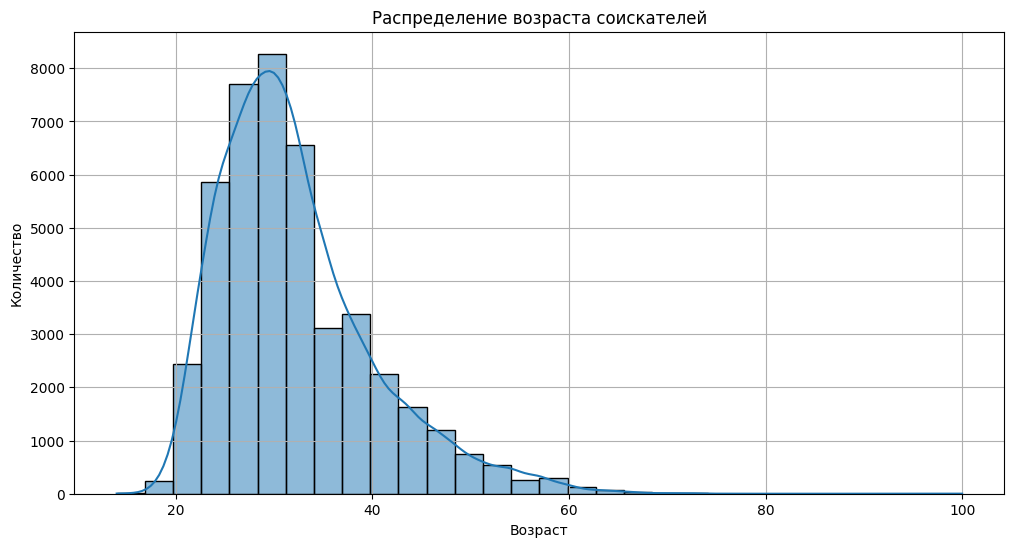

In [44]:
# ваш код здесь

plt.figure(figsize=(12, 6))
sns.histplot(head_hanter['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Мода
mode_age = head_hanter['Возраст'].mode()[0]

Выводы:
1. Модальное значение: 30 лет
2. Большинство соискателей в возрасте 20-40 лет

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

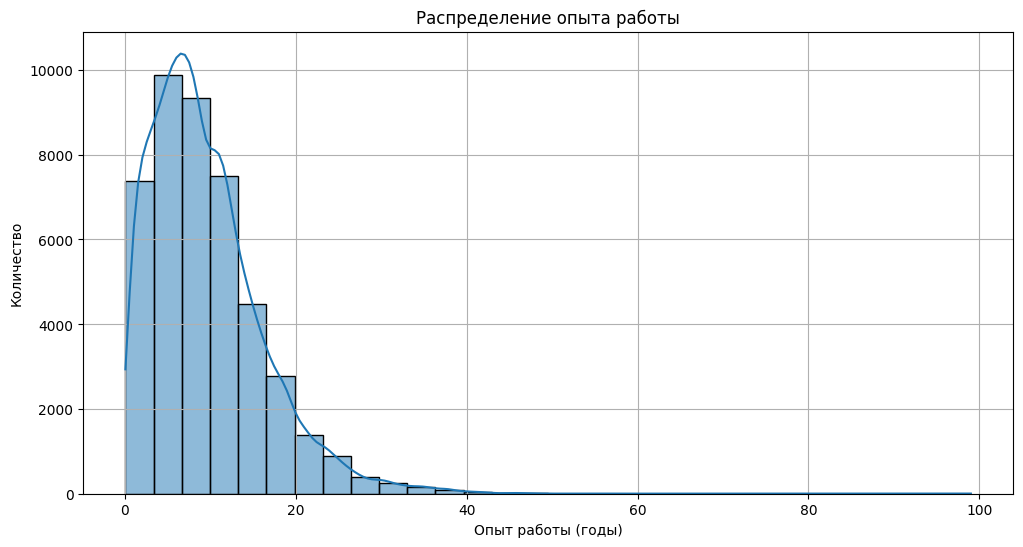

Максимальный опыт работы: 1188 месяцев


In [45]:
# ваш код здесь

# Конвертация месяцев в годы
head_hanter['Опыт работы (годы)'] = head_hanter['Опыт работы (месяц)'] / 12

plt.figure(figsize=(12, 6))
sns.histplot(head_hanter['Опыт работы (годы)'].dropna(), bins=30, kde=True)
plt.title('Распределение опыта работы')
plt.xlabel('Опыт работы (годы)')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Максимальный опыт
max_experience = head_hanter['Опыт работы (месяц)'].max()
print(f"Максимальный опыт работы: {max_experience:.0f} месяцев")

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


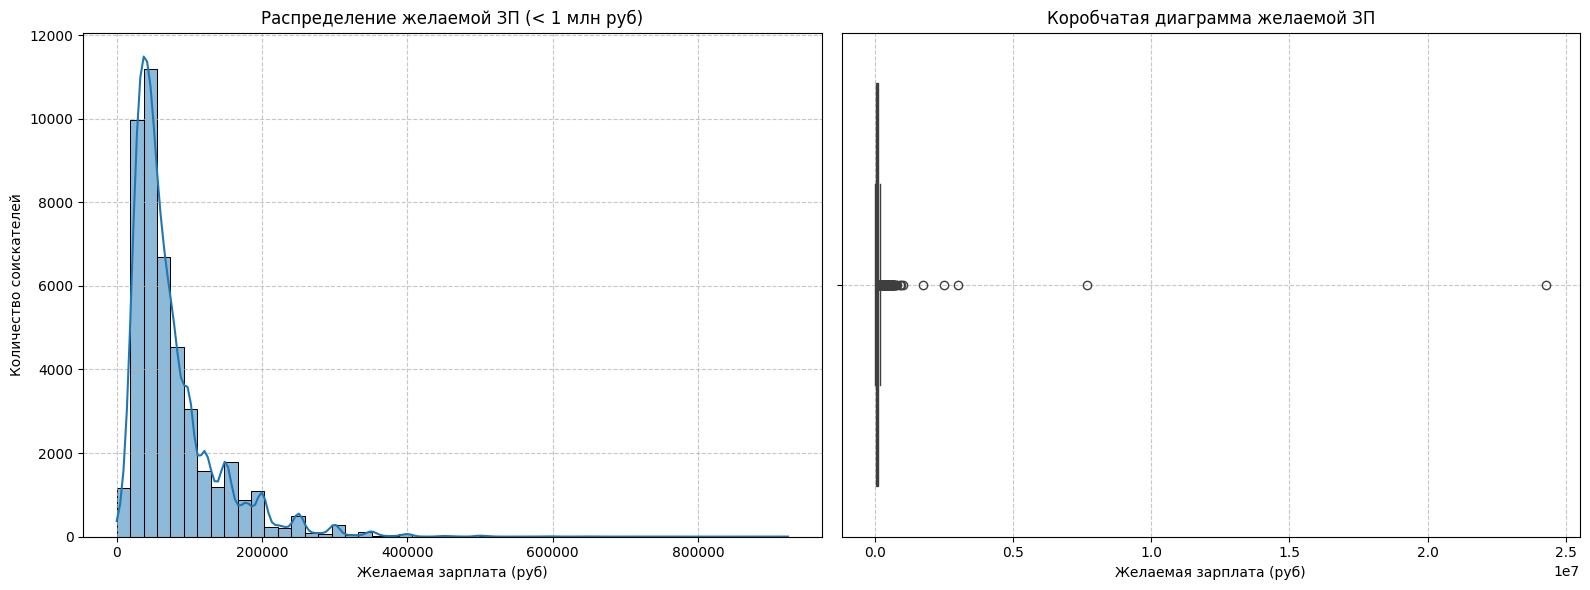

Основные статистики желаемой ЗП:
count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64


In [46]:
# ваш код здесь
# Создаем фигуру с двумя субплогами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма для ЗП до 1 млн рублей
sns.histplot(
    head_hanter[head_hanter['ЗП (руб)'] < 1000000]['ЗП (руб)'], 
    bins=50, 
    kde=True,
    ax=ax1
)
ax1.set_title('Распределение желаемой ЗП (< 1 млн руб)')
ax1.set_xlabel('Желаемая зарплата (руб)')
ax1.set_ylabel('Количество соискателей')
ax1.grid(True, linestyle='--', alpha=0.7)

# Коробчатая диаграмма для всего диапазона
sns.boxplot(
    x=head_hanter['ЗП (руб)'],
    ax=ax2
)
ax2.set_title('Коробчатая диаграмма желаемой ЗП')
ax2.set_xlabel('Желаемая зарплата (руб)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Отображаем графики
plt.tight_layout()
plt.show()

# Рассчитываем основные статистики
salary_stats = head_hanter['ЗП (руб)'].describe()
print("Основные статистики желаемой ЗП:")
print(salary_stats)


 Выводы: 
 
1.Медиана (50%): 59 019 руб. → Половина соискателей указывает желаемую ЗП ниже этой суммы, половина - выше

2.Среднее значение: 76 533 руб. → Существенно выше медианы (на 29.7%), что указывает на правостороннюю асимметрию распределения

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\207932343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


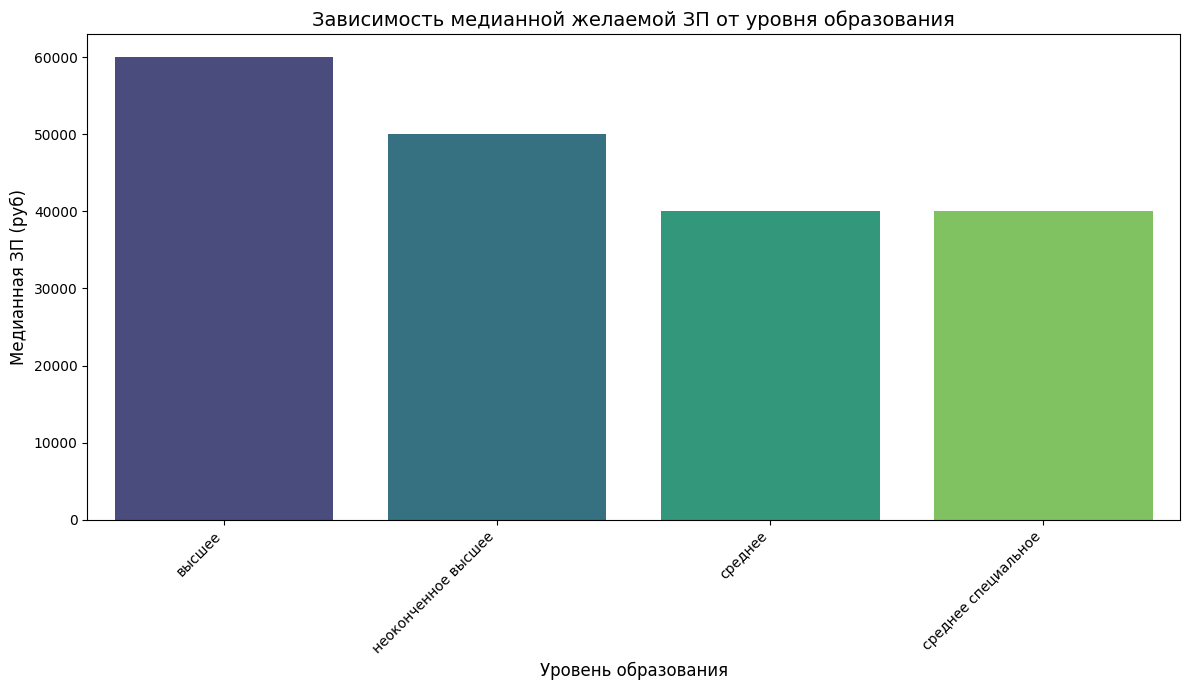

In [47]:
# Фильтрация данных (ЗП < 1 млн руб)
filtered_data = head_hanter[head_hanter['ЗП (руб)'] < 1000000]

# Группировка по образованию и расчет медианной ЗП
education_salary = filtered_data.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)

# Создание диаграммы
plt.figure(figsize=(12, 7))
sns.barplot(
    x=education_salary.index,
    y=education_salary.values,
    palette='viridis'
)

plt.title('Зависимость медианной желаемой ЗП от уровня образования', fontsize=14)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ваши выводы здесь
Выводы: 
 
1.Медиана (50%): 59 019 руб. → Половина соискателей указывает желаемую ЗП ниже этой суммы, половина - выше

2.Среднее значение: 76 533 руб. → Существенно выше медианы (на 29.7%), что указывает на правостороннюю асимметрию распределения

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\425655382.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


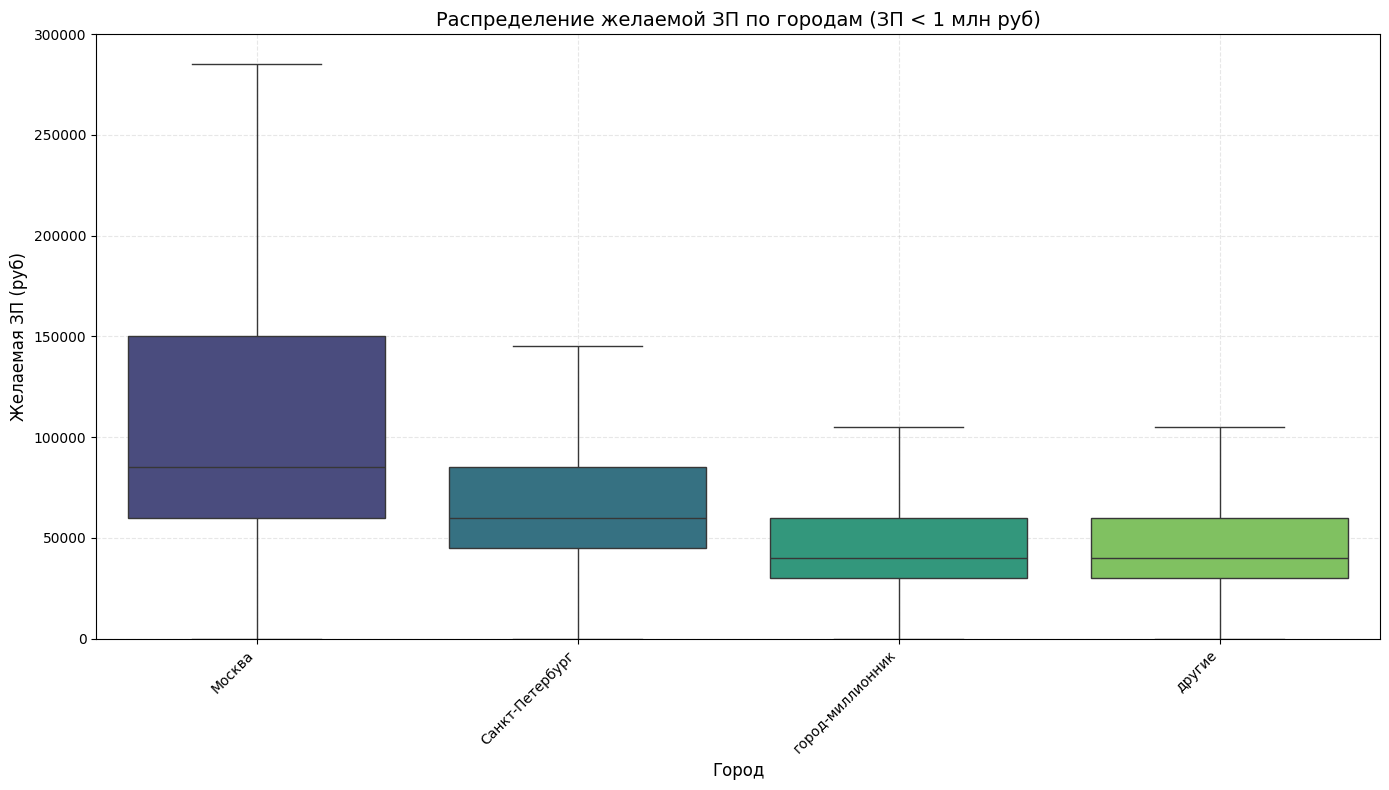

In [48]:
# ваш код здесь
# Фильтрация данных: ЗП < 1 млн руб
filtered_data = head_hanter[head_hanter['ЗП (руб)'] < 1000000]

# Выбор топ-10 городов по количеству резюме
top_cities = filtered_data['Город'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Город'].isin(top_cities)]

# Упорядочивание городов по медианной ЗП
city_order = filtered_data.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False).index

# Создание диаграммы
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Город',
    y='ЗП (руб)',
    data=filtered_data,
    order=city_order,
    palette='viridis',
    showfliers=False  # Скрываем выбросы для лучшей читаемости
)

plt.title('Распределение желаемой ЗП по городам (ЗП < 1 млн руб)', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Желаемая ЗП (руб)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300000)  # Ограничиваем диапазон для лучшей визуализации
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


ваши выводы здесь

Москва: 85 000 руб (максимальная медиана)

Санкт-Петербург: 60 000 руб (на 30% ниже Москвы)

Города-миллионники и другие: 40 000 руб (в 2 раза ниже Москвы)

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

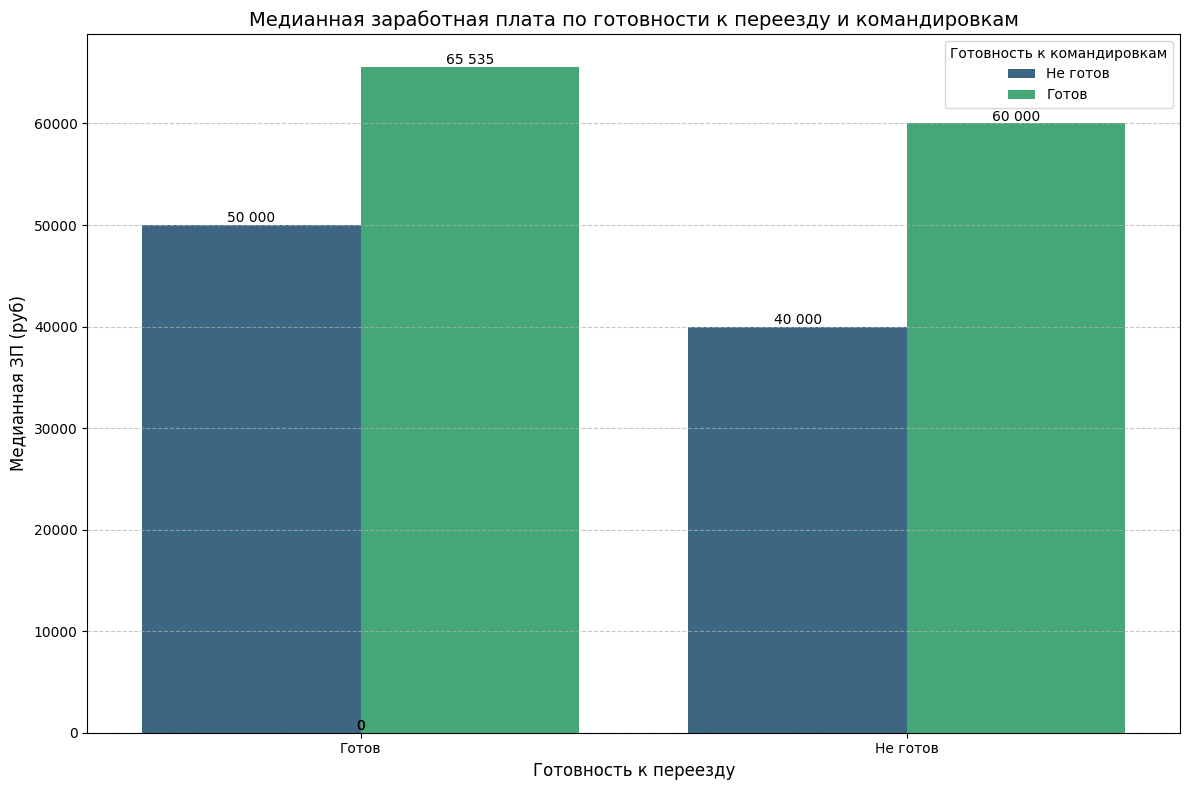

In [49]:
# ваш код здесь
# Фильтрация данных: ЗП < 1 млн руб
filtered_data = head_hanter[head_hanter['ЗП (руб)'] < 1000000]

# Группировка данных и расчет медианной ЗП
grouped_data = filtered_data.groupby(
    ['Готовность к переезду', 'Готовность к командировкам']
)['ЗП (руб)'].median().reset_index()

# Преобразование булевых значений в строки для лучшей читаемости
grouped_data['Готовность к переезду'] = grouped_data['Готовность к переезду'].map(
    {True: 'Готов', False: 'Не готов'})
grouped_data['Готовность к командировкам'] = grouped_data['Готовность к командировкам'].map(
    {True: 'Готов', False: 'Не готов'})

# Построение диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    data=grouped_data,
    palette='viridis',
    order=['Готов', 'Не готов']  # Порядок категорий
)

plt.title('Медианная заработная плата по готовности к переезду и командировкам', fontsize=14)
plt.xlabel('Готовность к переезду', fontsize=12)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.legend(title='Готовность к командировкам', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление подписей значений
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height()):,}'.replace(',', ' '),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

Вывод:

Готовность к переезду влияет на ЗП сильнее, чем готовность к командировкам. Максимальный доход у полностью мобильных специалистов.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\2544636058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Возрастная группа'] = pd.cut(filtered_data['Возраст'], bins=bins, labels=labels)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\2544636058.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


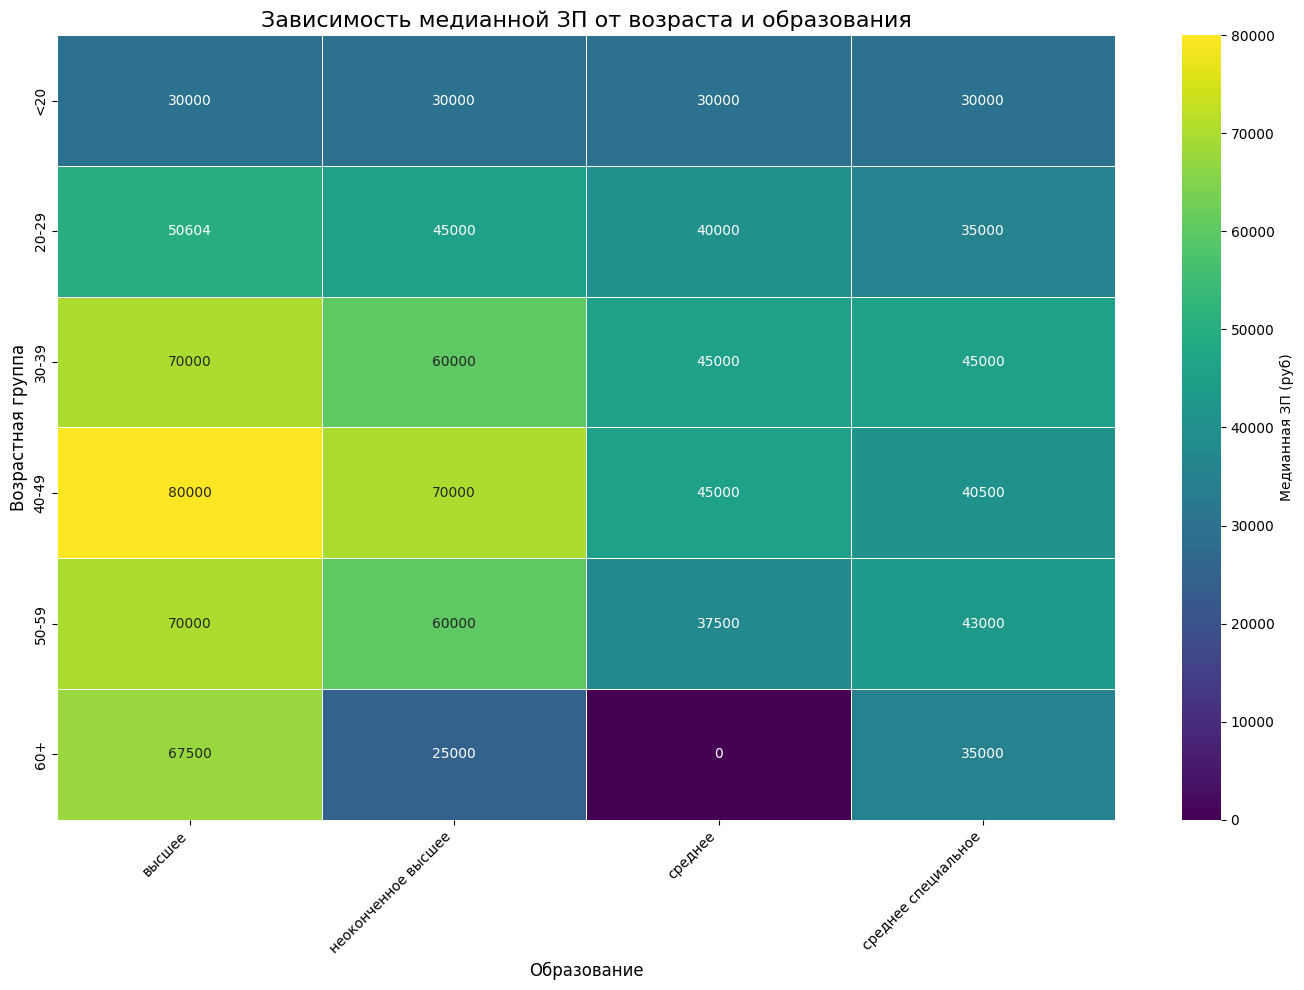

In [50]:
# ваш код здесь
# Фильтрация данных
filtered_data = head_hanter[head_hanter['ЗП (руб)'] < 1000000]

# Создание возрастных групп
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
filtered_data['Возрастная группа'] = pd.cut(filtered_data['Возраст'], bins=bins, labels=labels)

# Сводная таблица
pivot_table = pd.pivot_table(
    filtered_data,
    values='ЗП (руб)',
    index='Возрастная группа',
    columns='Образование',
    aggfunc='median',
    fill_value=0
)

# Упорядочивание столбцов по убыванию медианной ЗП
education_order = pivot_table.max().sort_values(ascending=False).index
pivot_table = pivot_table[education_order]

# Построение тепловой карты
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap='viridis',
    linewidths=0.5,
    cbar_kws={'label': 'Медианная ЗП (руб)'}
)

plt.title('Зависимость медианной ЗП от возраста и образования', fontsize=16)
plt.xlabel('Образование', fontsize=12)
plt.ylabel('Возрастная группа', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ваши выводы здесь
Максимальная зарплата у людей в возрасте 40-49 с высшим образованием

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

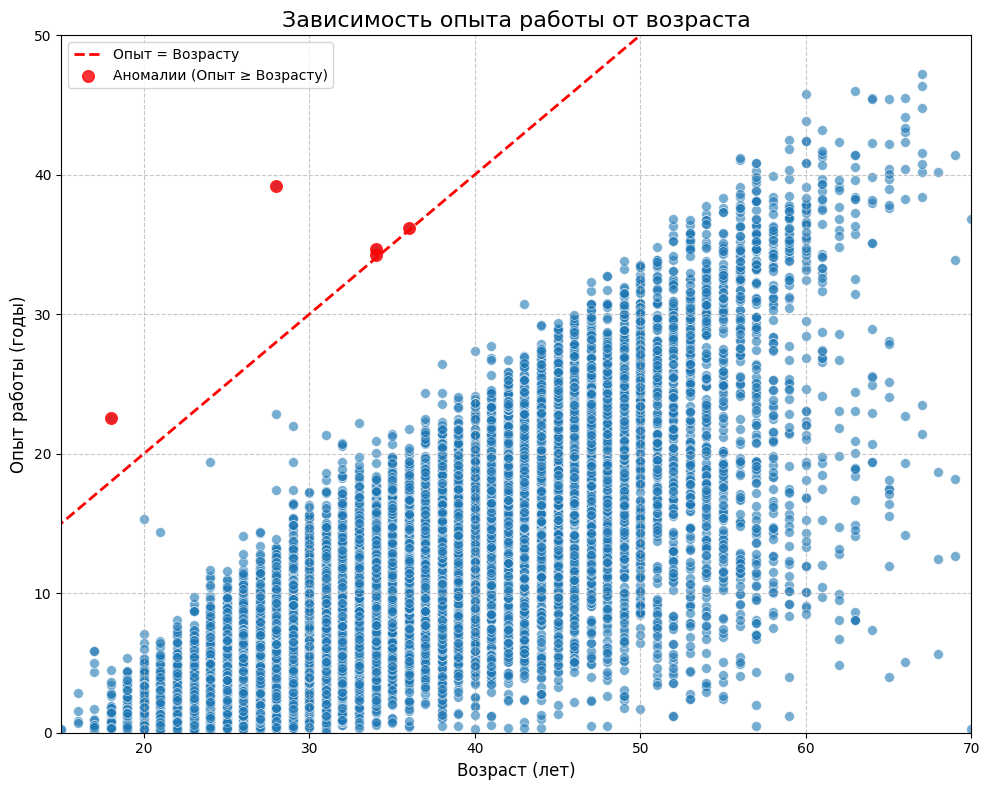

Обнаружено аномалий: 7 (0.02%)


In [51]:
# ваш код здесь
df = head_hanter.copy()

# Преобразуем опыт работы в годы
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

# Удаляем строки с пропусками в возрасте или опыте
df_clean = df.dropna(subset=['Возраст', 'Опыт работы (годы)'])

# Создаем фигуру
plt.figure(figsize=(10, 8))

# Диаграмма рассеяния
sns.scatterplot(
    x='Возраст',
    y='Опыт работы (годы)',
    data=df_clean,
    alpha=0.6,
    s=50
)

# Прямая "Опыт = Возрасту"
plt.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Опыт = Возрасту')

# Настройки графика
plt.title('Зависимость опыта работы от возраста', fontsize=16)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Опыт работы (годы)', fontsize=12)
plt.xlim(15, 70)
plt.ylim(0, 50)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Выделение аномалий
anomalies = df_clean[df_clean['Опыт работы (годы)'] >= df_clean['Возраст']]
if not anomalies.empty:
    plt.scatter(
        anomalies['Возраст'],
        anomalies['Опыт работы (годы)'],
        color='red',
        s=70,
        alpha=0.8,
        label='Аномалии (Опыт ≥ Возрасту)'
    )
    plt.legend()

plt.tight_layout()
plt.show()

# Статистика по аномалиям
print(f"Обнаружено аномалий: {len(anomalies)} ({len(anomalies)/len(df_clean)*100:.2f}%)")

ваши выводы здесь

Опыт работы прямопропорцианален возрасту 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


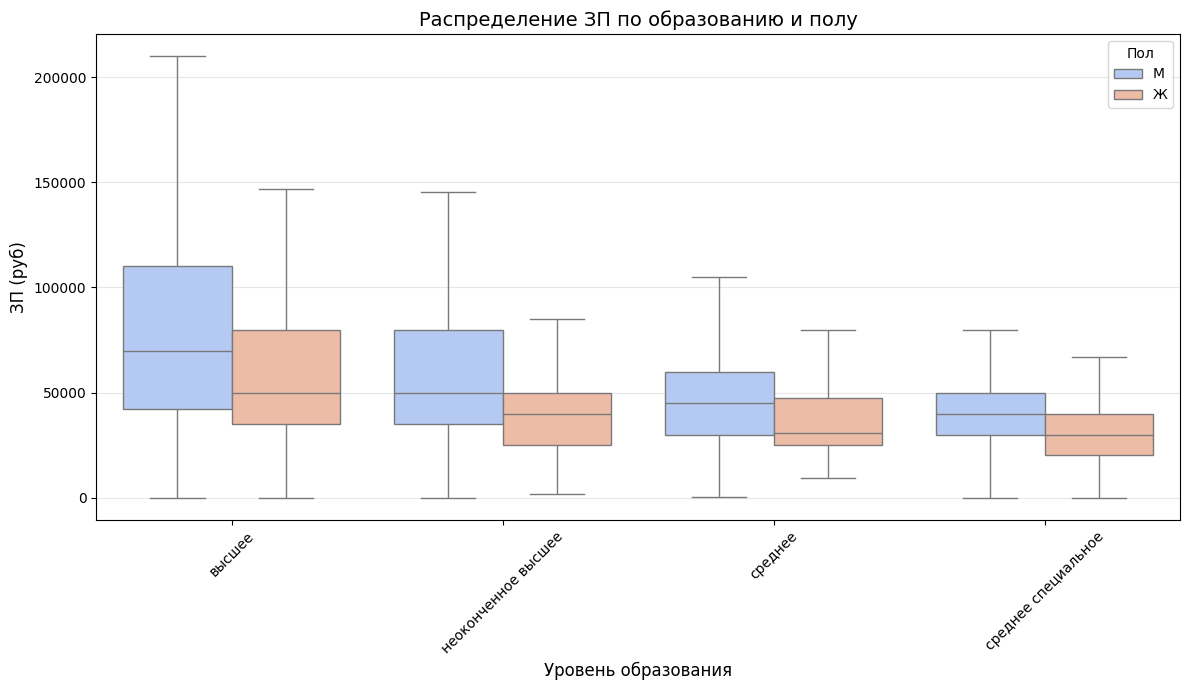

In [52]:
# ваш код здесь
plt.figure(figsize=(12, 7))
sns.boxplot(
    x='Образование',
    y='ЗП (руб)',
    hue='Пол',
    data=filtered_data[filtered_data['ЗП (руб)'] < 500000],
    showfliers=False,
    palette='coolwarm',
    order=education_order
)
plt.title('Распределение ЗП по образованию и полу', fontsize=14)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('ЗП (руб)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

ваши выводы здесь

Мужчины ожидают зарплату выше во всех категориях образования

C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\1844556978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Опыт группа'] = pd.cut(


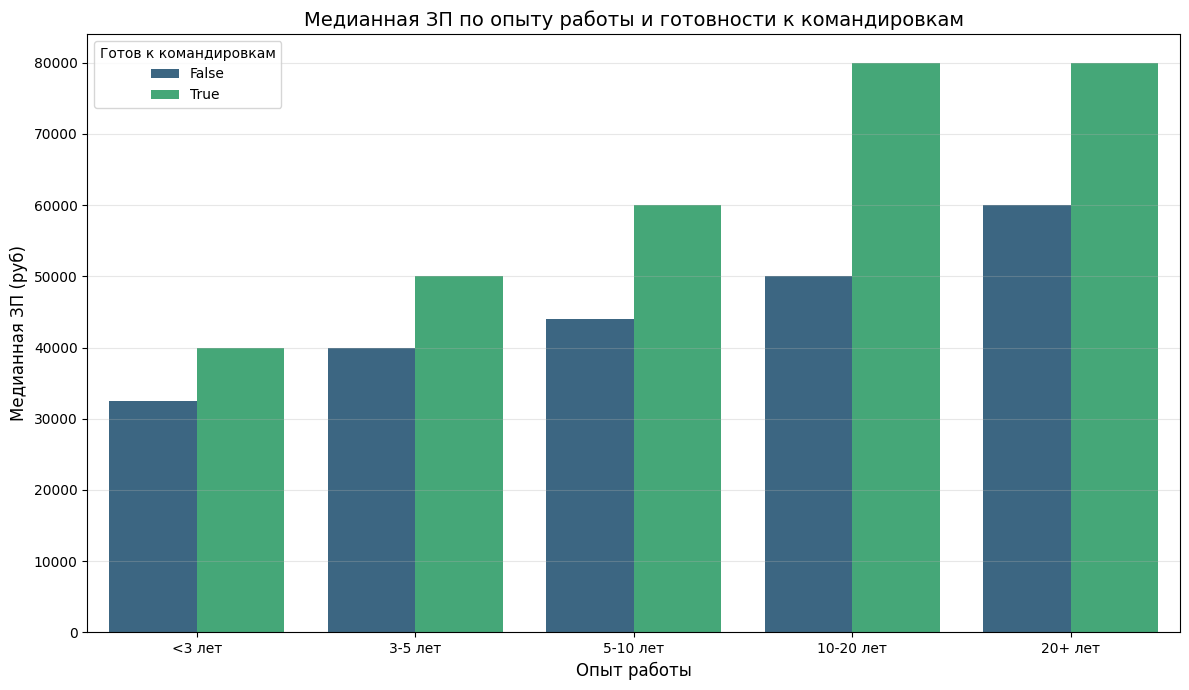

In [53]:
# Создание групп опыта
filtered_data['Опыт группа'] = pd.cut(
    filtered_data['Опыт работы (месяц)']/12,
    bins=[0, 3, 5, 10, 20, 50],
    labels=['<3 лет', '3-5 лет', '5-10 лет', '10-20 лет', '20+ лет']
)

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Опыт группа',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    data=filtered_data,
    estimator='median',
    palette='viridis',
    errorbar=None
)
plt.title('Медианная ЗП по опыту работы и готовности к командировкам', fontsize=14)
plt.xlabel('Опыт работы', fontsize=12)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.legend(title='Готов к командировкам')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Готовность к командировкам = +15-35% к ЗП во всех группах


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [54]:
duplicates = head_hanter[head_hanter.duplicated(subset=head_hanter.columns)]
head_hanter = head_hanter.drop_duplicates()
print(duplicates.shape[0])

158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [55]:
# ваш код здесь
# Вывод информации о пропусках по всем столбцам
missing_info = head_hanter.isnull().sum().reset_index()
missing_info.columns = ['Столбец', 'Количество пропусков']
missing_info['Доля пропусков (%)'] = (missing_info['Количество пропусков'] / len(head_hanter) * 100).round(2)

# Отображение результатов
print("Распределение пропусков по столбцам:")
print(missing_info.sort_values('Количество пропусков', ascending=False))

Распределение пропусков по столбцам:
                            Столбец  Количество пропусков  Доля пропусков (%)
23               Опыт работы (годы)                   168                0.38
8               Опыт работы (месяц)                   168                0.38
2      Последняя/нынешняя должность                     2                0.00
1   Последнее/нынешнее место работы                     1                0.00
14      Занятость: проектная работа                     0                0.00
22                         ЗП (руб)                     0                0.00
21           График: вахтовый метод                     0                0.00
20         График: удаленная работа                     0                0.00
19            График: гибкий график                     0                0.00
18           График: сменный график                     0                0.00
17              График: полный день                     0                0.00
16            Занятость: ст

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [56]:
# ваш код здесь
# Шаг 1: Удаление строк с пропусками в столбцах о месте работы и должности
head_hanter = head_hanter.dropna(
    subset=[
        'Последнее/нынешнее место работы',
        'Последняя/нынешняя должность'
    ],
    how='any'
)

# Шаг 2: Заполнение пропусков в опыте работы медианным значением
median_experience = head_hanter['Опыт работы (месяц)'].median()
head_hanter['Опыт работы (месяц)'] = head_hanter['Опыт работы (месяц)'].fillna(median_experience)

# Проверка результатов
mean_experience = head_hanter['Опыт работы (месяц)'].mean().round()

print(f"Среднее значение опыта работы после заполнения пропусков: {int(mean_experience)} месяцев")
print(f"Осталось пропусков в опыте работы: {head_hanter['Опыт работы (месяц)'].isna().sum()}")

Среднее значение опыта работы после заполнения пропусков: 115 месяцев
Осталось пропусков в опыте работы: 0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [57]:
# Сохраняем исходное количество записей
original_count = len(head_hanter)

# Выполняем фильтрацию зарплат
head_hunter_filtered = head_hanter[
    (1000 <= head_hanter['ЗП (руб)']) & 
    (head_hanter['ЗП (руб)'] <= 1000000)
]

# Считаем разницу
removed_count = original_count - len(head_hunter_filtered)
print(f"Удалено записей с выбросами по зарплате: {removed_count}")

# Обновляем исходный DataFrame
head_hunter = head_hunter_filtered

Удалено записей с выбросами по зарплате: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [58]:
# anomalies переменная ранее создавалась, и содержит строки с возраст < опыта работы
print(len(anomalies))
anomaly_indices = anomalies.index     # взяли индексы аномалий
head_hunter = head_hunter.drop(anomaly_indices)   # удалили их из общего df


7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

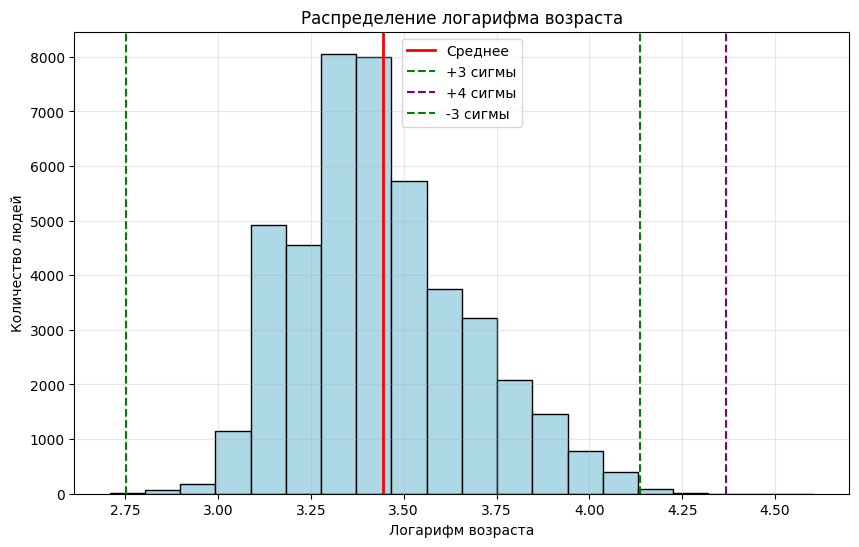


Найдено 1 выбросов


In [61]:

# Создаем копию данных
data = head_hunter.copy()

 # Считаем логарифм возраста
log_age = np.log(data['Возраст'])

# Находим среднее и стандартное отклонение
mean_val = np.mean(log_age)
std_val = np.std(log_age)

# Рисуем график
plt.figure(figsize=(10, 6))
plt.hist(log_age, bins=20, color='lightblue', edgecolor='black')
plt.title('Распределение логарифма возраста')
plt.xlabel('Логарифм возраста')
plt.ylabel('Количество людей')

# Добавляем линии на график
plt.axvline(mean_val, color='red', linewidth=2, label='Среднее')
plt.axvline(mean_val + 3*std_val, color='green', linestyle='--', label='+3 сигмы')
plt.axvline(mean_val + 4*std_val, color='purple', linestyle='--', label='+4 сигмы')
plt.axvline(mean_val - 3*std_val, color='green', linestyle='--', label='-3 сигмы')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Находим выбросы (тех, у кого логарифм возраста больше среднего + 4 сигмы)
z_scores = (log_age - mean_val) / std_val
outliers = z_scores > 4

# Смотрим на выбросы
outlier_data = data[outliers]
print(f"\nНайдено {len(outlier_data)} выбросов")


График показывает, что большинство людей имеют возраст около среднего значения.
Чем дальше от среднего, тем меньше людей такого возраста.